## Installing TGAN

In [3]:
pip install tgan

     |████████████████████████████████| 110.5 MB 1.9 kB/s 
     |████████████████████████████████| 273 kB 56.6 MB/s 
     |████████████████████████████████| 2.9 MB 39.3 MB/s 
     |████████████████████████████████| 20.1 MB 61.2 MB/s 
     |████████████████████████████████| 3.8 MB 50.0 MB/s 
     |████████████████████████████████| 503 kB 67.6 MB/s 
     |████████████████████████████████| 50 kB 6.3 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=8345bc3c152dd604424d1d674903e202f26a6b2c208f0627aa36b3788a5a9afc
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall:

## Importing libraries

In [4]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Mounting drive

In [5]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


## Loading and preprocessing data

In [6]:
with open('gdrive/Shareddrives/BMP/data/usable_data', 'r') as fout:
    usable_data = json.load(fout)

In [7]:
usable_data[0].keys()

dict_keys(['gas', 'elastic', 'ionization', 'excitation', 'swarm'])

In [8]:
df = pd.json_normalize(usable_data)

In [11]:
df.drop(['elastic.gas', 'ionization.gas', 'excitation.gas'], axis=1, inplace = True)

In [13]:
df_ip = pd.DataFrame()
df_ip['elastic.energy'] = df['elastic.energy'][0]
for i in range(45):
    df_ip[i+1] = df['elastic.crosssection'][i]

In [ ]:
df_ip = df_ip.drop(['elastic.energy'],axis=1)

### Log scaling

In [15]:
for column in df_ip.columns:
    df_ip[column] = np.log10(df_ip[column])

In [17]:
df_ip.to_csv('data.csv')

## TGAN Model 

In [18]:
from tgan.model import TGANModel

### Training

In [19]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [20]:
def tgan_fit(tgan, df_1):
  with tf.device('/device:GPU:0'):
    tgan.fit(df_1)
    return tgan

In [21]:
#for i, cluster in enumerate(clusters):
    
df_1 = pd.read_csv('/content/gdrive/Shareddrives/BMP/data/cluster3.csv').drop(['Unnamed: 0'], axis = 1) #pd.DataFrame(cluster)
cols = df_1.columns

# columns with continuous values
continuous_columns = np.arange(1,len(df_ip.columns)+1,1)
tgan = TGANModel(continuous_columns, batch_size = 2, max_epoch = 10, steps_per_epoch = 1000, learning_rate=0.001)
tgan = tgan_fit(tgan, df_1)

# generating synthetic samples
syn_data = tgan.sample(10000)
syn_data = syn_data.T
syn_data = syn_data.astype(np.float16)





[1203 09:50:49 @input_source.py:222] Setting up the queue 'QueueInput/input_queue' for CPU prefetching ...








Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
[1203 09:50:49 @registry.py:126] gen/LSTM/00/FC input: [2, 100]

Instructions for updating:
Please use `layer.__call__` method instead.
[1203 09:50:49 @registry.py:134] gen/LSTM/00/FC output: [2, 100]
[1203 09:50:49 @registry.py:126] gen/LSTM/00/FC2 input: [2, 100]
[1203 09:50:49 @registry.py:134] gen/LSTM/00/FC2 output: [2, 9]
[1203 09:50:49 @registry.py:126] gen/LSTM/00/FC3 input: [2, 9]
[1203 09:50:49 @registry.py:134] gen/LSTM/00/FC3 output: [2, 100]
[1203 09:50:50 @registry.py:126] gen/LSTM/01/FC input: [2, 100]
[1203 09:50:50 @registry.py:134] gen/LS

100%|#########9|999/1000[04:10<00:00, 5.08it/s]

100%|##########|1000/1000[04:36<00:00, 3.62it/s]

[1203 09:57:12 @base.py:285] Epoch 1 (global_step 1000) finished, time:4 minutes 36 seconds.



[1203 09:57:14 @saver.py:79] Model saved to output/model/model-1000.
[1203 09:57:14 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 0.5
[1203 09:57:14 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0
[1203 09:57:14 @monitor.py:467] GAN_loss/discrim/loss: 0.83136
[1203 09:57:14 @monitor.py:467] GAN_loss/gen/final-g-loss: 165
[1203 09:57:14 @monitor.py:467] GAN_loss/gen/klloss: 163.87
[1203 09:57:14 @monitor.py:467] GAN_loss/gen/loss: 1.1221
[1203 09:57:14 @monitor.py:467] QueueInput/queue_size: 50
[1203 09:57:14 @base.py:275] Start Epoch 2 ...


100%|##########|1000/1000[03:18<00:00, 5.05it/s]

[1203 10:00:33 @base.py:285] Epoch 2 (global_step 2000) finished, time:3 minutes 18 seconds.


[1203 10:00:33 @saver.py:79] Model saved to output/model/model-2000.
[1203 10:00:33 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 1
[1203 10:00:33 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0
[1203 10:00:33 @monitor.py:467] GAN_loss/discrim/loss: 0.60249
[1203 10:00:33 @monitor.py:467] GAN_loss/gen/final-g-loss: 187.45
[1203 10:00:33 @monitor.py:467] GAN_loss/gen/klloss: 186.19
[1203 10:00:33 @monitor.py:467] GAN_loss/gen/loss: 1.2653
[1203 10:00:33 @monitor.py:467] QueueInput/queue_size: 50
[1203 10:00:33 @base.py:275] Start Epoch 3 ...


100%|##########|1000/1000[03:18<00:00, 5.05it/s]

[1203 10:03:51 @base.py:285] Epoch 3 (global_step 3000) finished, time:3 minutes 18 seconds.
[1203 10:03:51 @saver.py:79] Model saved to output/model/model-3000.
[1203 10:03:51 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 1
[1203 10:03:51 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0
[1203 10:03:51 @monitor.py:467] GAN_loss/discrim/loss: 0.66528
[1203 10:03:51 @monitor.py:467] GAN_loss/gen/final-g-loss: 206.84
[1203 10:03:51 @monitor.py:467] GAN_loss/gen/klloss: 205.69
[1203 10:03:51 @monitor.py:467] GAN_loss/gen/loss: 1.1454
[1203 10:03:51 @monitor.py:467] QueueInput/queue_size: 50
[1203 10:03:51 @base.py:275] Start Epoch 4 ...



100%|##########|1000/1000[03:19<00:00, 5.01it/s]

[1203 10:07:10 @base.py:285] Epoch 4 (global_step 4000) finished, time:3 minutes 19 seconds.


[1203 10:07:11 @saver.py:79] Model saved to output/model/model-4000.
[1203 10:07:11 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 1
[1203 10:07:11 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0
[1203 10:07:11 @monitor.py:467] GAN_loss/discrim/loss: 0.63944
[1203 10:07:11 @monitor.py:467] GAN_loss/gen/final-g-loss: 278.31
[1203 10:07:11 @monitor.py:467] GAN_loss/gen/klloss: 277.13
[1203 10:07:11 @monitor.py:467] GAN_loss/gen/loss: 1.1769
[1203 10:07:11 @monitor.py:467] QueueInput/queue_size: 50
[1203 10:07:11 @base.py:275] Start Epoch 5 ...


100%|##########|1000/1000[03:18<00:00, 5.05it/s]

[1203 10:10:29 @base.py:285] Epoch 5 (global_step 5000) finished, time:3 minutes 18 seconds.
[1203 10:10:29 @saver.py:79] Model saved to output/model/model-5000.
[1203 10:10:29 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 1
[1203 10:10:29 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0
[1203 10:10:29 @monitor.py:467] GAN_loss/discrim/loss: 0.63825
[1203 10:10:29 @monitor.py:467] GAN_loss/gen/final-g-loss: 162.66
[1203 10:10:29 @monitor.py:467] GAN_loss/gen/klloss: 161.52
[1203 10:10:29 @monitor.py:467] GAN_loss/gen/loss: 1.1431
[1203 10:10:29 @monitor.py:467] QueueInput/queue_size: 50
[1203 10:10:29 @base.py:275] Start Epoch 6 ...



100%|##########|1000/1000[03:15<00:00, 5.12it/s]

[1203 10:13:44 @base.py:285] Epoch 6 (global_step 6000) finished, time:3 minutes 15 seconds.
[1203 10:13:44 @saver.py:79] Model saved to output/model/model-6000.
[1203 10:13:44 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 0.5
[1203 10:13:44 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0
[1203 10:13:44 @monitor.py:467] GAN_loss/discrim/loss: 0.65575
[1203 10:13:44 @monitor.py:467] GAN_loss/gen/final-g-loss: 205.47
[1203 10:13:44 @monitor.py:467] GAN_loss/gen/klloss: 204.39
[1203 10:13:44 @monitor.py:467] GAN_loss/gen/loss: 1.0813
[1203 10:13:44 @monitor.py:467] QueueInput/queue_size: 50
[1203 10:13:44 @base.py:275] Start Epoch 7 ...



100%|##########|1000/1000[03:17<00:00, 5.05it/s]

[1203 10:17:02 @base.py:285] Epoch 7 (global_step 7000) finished, time:3 minutes 17 seconds.


[1203 10:17:02 @saver.py:79] Model saved to output/model/model-7000.
[1203 10:17:02 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 1
[1203 10:17:02 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0
[1203 10:17:02 @monitor.py:467] GAN_loss/discrim/loss: 0.70162
[1203 10:17:02 @monitor.py:467] GAN_loss/gen/final-g-loss: 102.27
[1203 10:17:02 @monitor.py:467] GAN_loss/gen/klloss: 101.14
[1203 10:17:02 @monitor.py:467] GAN_loss/gen/loss: 1.1362
[1203 10:17:02 @monitor.py:467] QueueInput/queue_size: 50
[1203 10:17:02 @base.py:275] Start Epoch 8 ...


100%|##########|1000/1000[03:17<00:00, 5.07it/s]

[1203 10:20:20 @base.py:285] Epoch 8 (global_step 8000) finished, time:3 minutes 17 seconds.


[1203 10:20:20 @saver.py:79] Model saved to output/model/model-8000.
[1203 10:20:20 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 1
[1203 10:20:20 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0
[1203 10:20:20 @monitor.py:467] GAN_loss/discrim/loss: 0.63115
[1203 10:20:20 @monitor.py:467] GAN_loss/gen/final-g-loss: 223.79
[1203 10:20:20 @monitor.py:467] GAN_loss/gen/klloss: 222.59
[1203 10:20:20 @monitor.py:467] GAN_loss/gen/loss: 1.2044
[1203 10:20:20 @monitor.py:467] QueueInput/queue_size: 50
[1203 10:20:20 @base.py:275] Start Epoch 9 ...


100%|##########|1000/1000[03:18<00:00, 5.04it/s]

[1203 10:23:38 @base.py:285] Epoch 9 (global_step 9000) finished, time:3 minutes 18 seconds.
[1203 10:23:38 @saver.py:79] Model saved to output/model/model-9000.
[1203 10:23:38 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 1
[1203 10:23:38 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0
[1203 10:23:38 @monitor.py:467] GAN_loss/discrim/loss: 0.6333
[1203 10:23:38 @monitor.py:467] GAN_loss/gen/final-g-loss: 105.51
[1203 10:23:38 @monitor.py:467] GAN_loss/gen/klloss: 104.3
[1203 10:23:38 @monitor.py:467] GAN_loss/gen/loss: 1.2027
[1203 10:23:38 @monitor.py:467] QueueInput/queue_size: 50
[1203 10:23:38 @base.py:275] Start Epoch 10 ...



100%|##########|1000/1000[03:16<00:00, 5.08it/s]

[1203 10:26:55 @base.py:285] Epoch 10 (global_step 10000) finished, time:3 minutes 16 seconds.
[1203 10:26:55 @saver.py:79] Model saved to output/model/model-10000.
[1203 10:26:55 @monitor.py:467] GAN_loss/discrim/accuracy_fake: 1
[1203 10:26:55 @monitor.py:467] GAN_loss/discrim/accuracy_real: 0
[1203 10:26:55 @monitor.py:467] GAN_loss/discrim/loss: 0.68147
[1203 10:26:55 @monitor.py:467] GAN_loss/gen/final-g-loss: 182.9
[1203 10:26:55 @monitor.py:467] GAN_loss/gen/klloss: 181.76
[1203 10:26:55 @monitor.py:467] GAN_loss/gen/loss: 1.1393
[1203 10:26:55 @monitor.py:467] QueueInput/queue_size: 50
[1203 10:26:55 @base.py:289] Training has finished!



[1203 10:26:57 @input_source.py:178] EnqueueThread QueueInput/input_queue Exited.

[1203 10:27:13 @collection.py:146] New collections created in tower : tf.GraphKeys.REGULARIZATION_LOSSES
[1203 10:27:13 @collection.py:165] These collections were modified but restored in : (tf.GraphKeys.SUMMARIES: 0->2)


[1203 10:27:13 @sessinit.py:87] WRN The following variables are in the checkpoint, but not found in the graph: global_step, optimize/beta1_power, optimize/beta2_power
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[1203 10:27:22 @sessinit.py:114] Restoring checkpoint from output/model/model-10000 ...
INFO:tensorflow:Restoring parameters from output/model/model-10000


|          |4999/?[02:45<00:00,30.13it/s]


### Saving the model

In [22]:
model_path = 'models/tgan.pkl'

In [23]:
tgan.save(model_path)

[1203 10:30:24 @model.py:813] Model saved successfully.


### Filterting data using butterworth filter

In [24]:
# Butterworth filter 
import numpy as np
from scipy.signal import butter, filtfilt
# Filter requirements.
T = 5.0         # Sample Period
fs = 30.0       # sample rate, Hz
cutoff = 2      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

In [25]:
filtered_syn_data = []
for i in range(len(syn_data.columns)-1):
    filtered_syn_data.append(butter_lowpass_filter(syn_data[i], cutoff, fs, order))

### Plotting

Text(0.5, 1.0, 'TGAN with filtering - cluster 4')

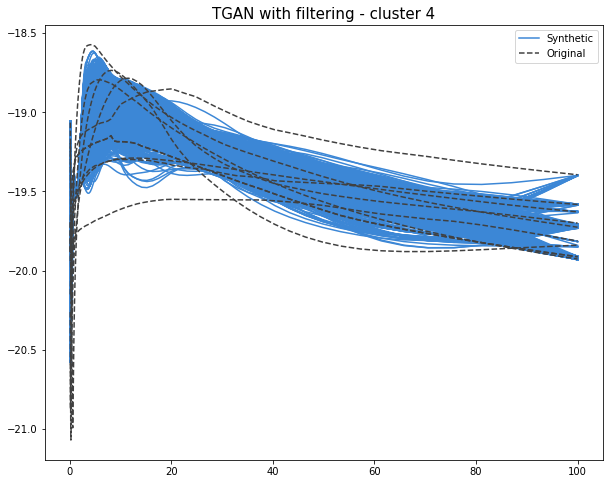

In [28]:
##plt.plot(x1, label = 'Real')
plt.figure(figsize = [10,8])
for i in range(len(syn_data.columns)-1):
    plt.plot(list(df['elastic.energy'][0]), filtered_syn_data[i], '#3c87d6', alpha = 1)
    
plt.plot(list(df['elastic.energy'][0]), filtered_syn_data[-1], color='#3c87d6', label = 'Synthetic')
#plt.show()

for i in range(len(df_1)):
    plt.plot(list(df['elastic.energy'][0]), df_1.iloc[i], color='#404040', ls = '--', alpha = 1)
plt.plot(list(df['elastic.energy'][0]), df_1.iloc[-1], color='#404040', ls = '--', alpha = 1, label='Original')
# plt.xlim([1e-1, 1e2])
plt.legend()
plt.title('TGAN with filtering - cluster 4', fontsize = 15)
#plt.savefig('fig1.png')

In [29]:
pd.DataFrame(syn_data).to_csv('data_output_c3.csv', index = False)